In [1]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('datasets/housing_prices/train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()
### 1460 rows, 81 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing['Alley'].value_counts()
## change nulls for 'NA' and treat it as a new type of val

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
missing_val_count_by_column = (housing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


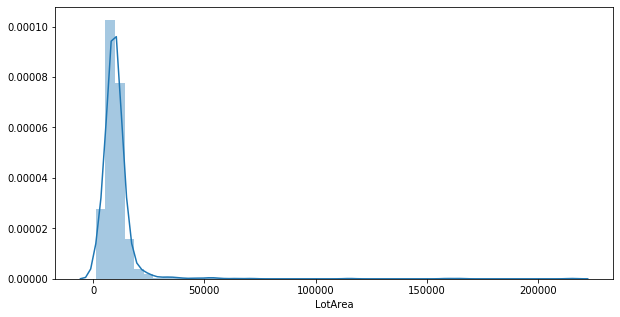

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(housing['LotArea'])
plt.show()

In [14]:
cat_columns = housing.select_dtypes(include='object').columns
num_columns = housing.select_dtypes(exclude='object').columns

In [15]:
cat_columns.shape

(43,)

In [16]:
num_columns.shape

(38,)

### Problems to solve:
1. Categorical encodings: what's the best strategy?
2. Missing value imputation: just the mean?

## Missing values

In [17]:
##################
## in cat cols
##################
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [19]:
##################
## in num cols
##################
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [21]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


#### Imputing MasVnrArea

In [23]:
housing['MasVnrArea'].head(10)
### most vals are zero

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

In [27]:
indices = housing[housing['MasVnrArea'].isnull()].index

In [25]:
housing['MasVnrArea'].mode()

0    0.0
dtype: float64

In [29]:
for idx in indices:
    housing.at[idx, 'MasVnrArea'] = 0.0

#### Imputing LotFrontage

In [31]:
### 259 rows. Is it sensible to impute using mean or median?
### won't it affect training? wouldn't it be better to drop these rows instead?
from sklearn.impute import SimpleImputer

In [32]:
lotFrontageImputer = SimpleImputer(strategy='mean')
lotFrontageImputer.fit(housing['LotFrontage'].values.reshape(-1, 1))
housing['LotFrontage'] = lotFrontageImputer.transform(housing['LotFrontage'].values.reshape(-1, 1))

#### Imputing GarageYrBlt

In [33]:
garageYrBltImputer = SimpleImputer(strategy='mean')
garageYrBltImputer.fit(housing['GarageYrBlt'].values.reshape(-1, 1))
housing['GarageYrBlt'] = garageYrBltImputer.transform(housing['GarageYrBlt'].values.reshape(-1, 1))

In [34]:
### Do we still have missing vals in num cols?
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Let's impute cat cols

In [35]:
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [36]:
### 1460 is the total num of rows in training set
### some cols have missing vals, we have 3 options:
### 1) drop rows (cannot be done on test set)
### 2) drop cols (if and only if there are a lot of missing vals)
### 3) impute vals (if and only if there are not too many missing vals)

### We need to test different effects of
### 1) Using imputed vals while training
### 2) Dropping cols while training

In [ ]:
unnecessary_cols = ['Id', '']

#### Imputing Alley

In [38]:
housing['Alley'] = housing['Alley'].fillna('NAA') # NAA: no alley access

#### Imputing MasVnrType

In [39]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [40]:
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

#### Imputing BsmtQual

In [42]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [43]:
housing['BsmtQual'] = housing['BsmtQual'].fillna('NB') # NB: no basement - this assumes that in test set var looks same

#### Imputing BsmtCond